# Quantile regression

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('white')

%load_ext autoreload
%autoreload 2

import qreg 
import estimation

In [2]:
np.random.seed(1)

# Illustration

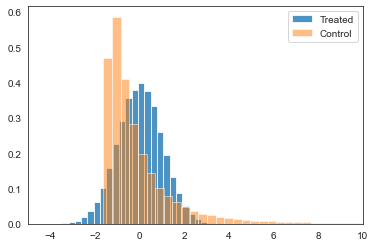

In [3]:
N = 100_000
x_treat = np.random.normal(size=(N,))
x_control = np.random.lognormal(size=(N,)) - np.sqrt(np.exp(1)) # lognormal with zero mean 
x_control = x_control[x_control < 10.]
fig,ax = plt.subplots(); 
ax.hist(x_treat,  bins=30, label='Treated', alpha=0.8, density=True);
ax.hist(x_control,bins=30, label='Control', alpha=0.5, density=True);
ax.legend(); 
ax.set_xlim((-5,10)); 
plt.savefig('treat_vs_control.pdf')

# Simulate data

In [4]:
K = 2
N = 10_000 
theta = np.array([1,1])
alpha = np.array([1,3])

In [5]:
y,x = qreg.sim_data(theta, N, alpha)

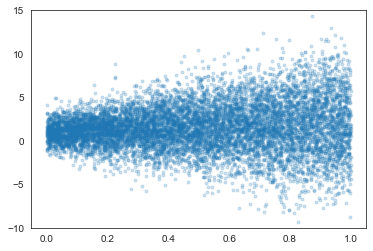

In [6]:
plt.plot(x[:,1], y, '.', alpha=0.2); 
plt.ylim((-10,15))
plt.savefig('sim_data.pdf'); 

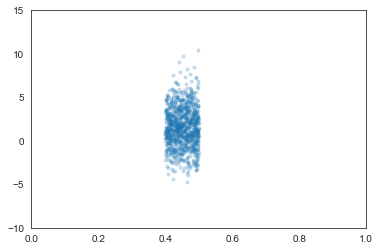

In [7]:
bi = qreg.discretize_into_percentile_bins(x[:, 1], Np=10)
I = bi == 5
plt.plot(x[I,1], y[I], '.', alpha=0.2); 
plt.xlim((0,1))
plt.ylim((-10,15))
plt.savefig('sim_data_mid_bin.pdf'); 

In [8]:
Np = 10 # number of groups 

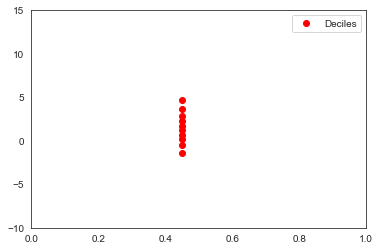

In [9]:
bi = qreg.discretize_into_percentile_bins(x[:, 1], Np)
I = bi == 5

fig,ax = plt.subplots(); 
# ax.plot(x[I,1], y[I], '.', alpha=0.2, label='Data'); 

yy_ = np.percentile(y[I], np.linspace(0,100,Np+2)[1:-1])
xx_ = x[I,1].mean() * np.ones((Np,))
ax.plot(xx_, yy_, 'or', label='Deciles')
ax.set_xlim((0,1))
ax.set_ylim((-10,15))
ax.legend(); 
plt.savefig('sim_data_mid_quants.pdf'); 

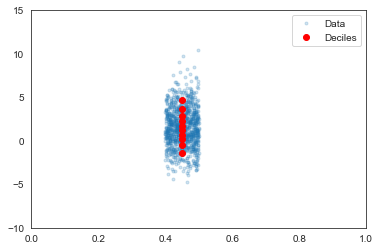

In [10]:
bi = qreg.discretize_into_percentile_bins(x[:, 1], Np)
I = bi == 5

fig,ax = plt.subplots(); 
ax.plot(x[I,1], y[I], '.', alpha=0.2, label='Data'); 
ax.set_xlim((0,1))

yy_ = np.percentile(y[I], np.linspace(0,100,Np+2)[1:-1])
xx_ = x[I,1].mean() * np.ones((Np,))
ax.plot(xx_, yy_, 'or', label='Deciles')
ax.legend(); 
ax.set_ylim((-10,15))
plt.savefig('sim_data_mid_both.pdf'); 

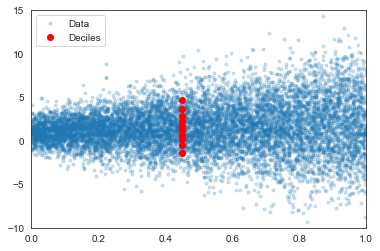

In [11]:
bi = qreg.discretize_into_percentile_bins(x[:, 1], Np=10)
I = bi == 5

fig,ax = plt.subplots(); 
ax.plot(x[:,1], y, '.', alpha=0.2, label='Data'); 
ax.set_xlim((0,1))

yy_ = np.percentile(y[I], np.linspace(0,100,Np+2)[1:-1])
xx_ = x[I,1].mean() * np.ones((Np,))
ax.plot(xx_, yy_, 'or', label='Deciles')
ax.legend(); 
ax.set_ylim((-10,15))
plt.savefig('sim_data_mid_bin_full.pdf'); 

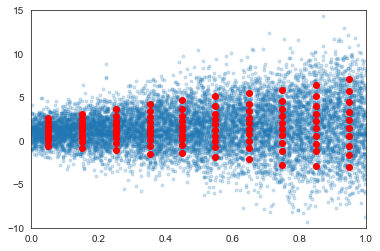

In [12]:
Np = 10 
bi = qreg.discretize_into_percentile_bins(x[:, 1], Np)

fig,ax = plt.subplots(); 
ax.plot(x[:,1], y, '.', alpha=0.2, label='Data'); 
ax.set_xlim((0,1))

for i in range(1,Np+1): 
    I = bi == i
    yy_ = np.percentile(y[I], np.linspace(0,100,Np+2)[1:-1])
    xx_ = x[I,1].mean() * np.ones((Np,))
    ax.plot(xx_, yy_, 'or')
ax.set_ylim((-10,15))
plt.savefig('sim_data_full_all.pdf'); 

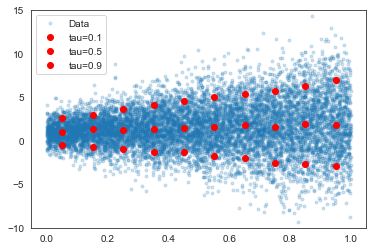

In [13]:
tau = 0.9
Np = 10
fig,ax = plt.subplots(); 
ax.plot(x[:,1], y, '.', label=f'Data', alpha=0.2)

qreg.plot_cond_percentile(y, x, tau=0.1, Np=Np, ax=ax, color='r'); 
qreg.plot_cond_percentile(y, x, tau=0.5, Np=Np, ax=ax, color='r'); 
qreg.plot_cond_percentile(y, x, tau=0.9, Np=Np, ax=ax, color='r'); 
ax.legend(); 
ax.set_ylim((-10,15))
plt.savefig('sim_data_with_quants.pdf'); 

# Estimate

In [14]:
tau = 0.9
theta0 = qreg.starting_values(y, x, tau)
q = lambda theta, y, x: qreg.q(theta, y, x, tau)
res = estimation.estimate(q, theta0, y, x, method='Nelder-Mead')

pd.DataFrame({'Est': res['theta'], 't': res['t']}, index=['Beta1(tau)', 'Beta2(tau)'])

Optimization terminated successfully.
         Current function value: 0.433616
         Iterations: 56
         Function evaluations: 108


,Est,t
Beta1(tau),2.350044,34.942983
Beta2(tau),4.737365,40.589820


Note that we are not getting close to the truth (and we are not even estimating the $\alpha$ parameters! 

In [15]:
def est(tau, y, x): 
    theta0 = qreg.starting_values(y, x, tau)
    q = lambda theta, y, x: qreg.q(theta, y, x, tau)
    res = estimation.estimate(q, theta0, y, x, method='Nelder-Mead')
    return res['theta']    

## $\tau = 0.9$

Optimization terminated successfully.
         Current function value: 0.433616
         Iterations: 56
         Function evaluations: 108


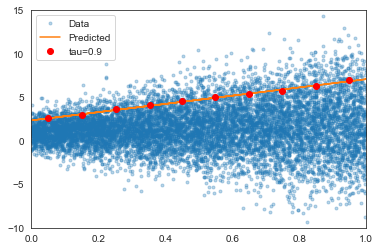

In [16]:
tau = 0.9
thetahat = est(tau, y, x)
ax = qreg.plot_data_and_predicted_against_x2(y,x,thetahat,k=1)
qreg.plot_cond_percentile(y, x, tau, Np=Np, ax=ax, color='red'); 
ax.legend(); 
ax.set_ylim((-10,15)); 
ax.set_xlim((0,1));
plt.savefig('fit_tau_90.pdf'); 

## $\tau = 0.5$

Optimization terminated successfully.
         Current function value: 0.995300
         Iterations: 34
         Function evaluations: 64


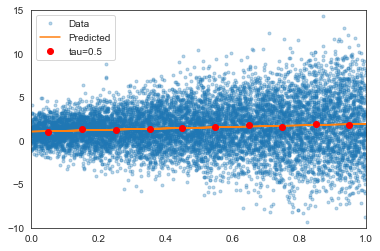

In [17]:
tau = 0.5 # median 
thetahat = est(tau, y, x)
ax = qreg.plot_data_and_predicted_against_x2(y,x,thetahat,k=1)
qreg.plot_cond_percentile(y, x, tau=tau, Np=Np, ax=ax, color='red'); 
ax.legend(); 
ax.set_ylim((-10,15)); 
ax.set_xlim((0,1));
plt.savefig('fit_tau_50.pdf'); 

## $\tau = 0.1$

Optimization terminated successfully.
         Current function value: 0.439707
         Iterations: 54
         Function evaluations: 100


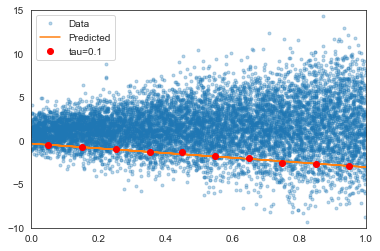

In [18]:
tau = 0.1 # median 
thetahat = est(tau, y, x)
ax = qreg.plot_data_and_predicted_against_x2(y,x,thetahat,k=1)
qreg.plot_cond_percentile(y, x, tau=tau, Np=Np, ax=ax, color='red'); 
ax.legend(); 
ax.set_ylim((-10,15)); 
ax.set_xlim((0,1));
plt.savefig('fit_tau_10.pdf'); 

Optimization terminated successfully.
         Current function value: 0.439707
         Iterations: 54
         Function evaluations: 100
Optimization terminated successfully.
         Current function value: 0.698983
         Iterations: 51
         Function evaluations: 101
Optimization terminated successfully.
         Current function value: 0.868654
         Iterations: 47
         Function evaluations: 90
Optimization terminated successfully.
         Current function value: 0.963018
         Iterations: 46
         Function evaluations: 88
Optimization terminated successfully.
         Current function value: 0.995300
         Iterations: 34
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.963300
         Iterations: 52
         Function evaluations: 100
Optimization terminated successfully.
         Current function value: 0.867148
         Iterations: 48
         Function evaluations: 92
Optimization terminated success

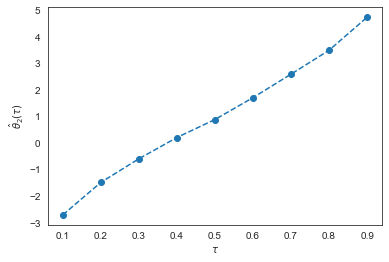

In [19]:
taus = np.linspace(0.1, 0.9, 9)
ts = np.empty((9, 2))
for i,tau in enumerate(taus): 
    ts[i,:] = est(tau, y, x)
plt.plot(taus, ts[:, 1], '--o'); 
plt.xlabel('$\\tau$'); 
plt.ylabel('$\\hat{\\theta}_2(\\tau)$'); 
plt.savefig('estimates_over_tau_range_0.pdf'); 

# Alternative DGP 

In [20]:
from scipy.stats import chi2

In [21]:
np.random.seed(2)
N = 10_000
theta = np.array([1,1])
icdf = lambda x : chi2.ppf(x, df=1)
y,x = qreg.sim_data_alt(theta, N, icdf)

Optimization terminated successfully.
         Current function value: 0.499749
         Iterations: 59
         Function evaluations: 108


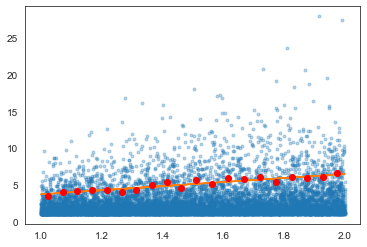

In [22]:
tau = 0.9
thetahat = est(tau, y, x)
ax = qreg.plot_data_and_predicted_against_x2(y, x, thetahat);
qreg.plot_cond_percentile(y, x, tau, Np=20, ax=ax, color='red'); 

## Show range

Below, we will plot the estimates, $\hat{\beta}(\tau)$, over a range of values $\tau \in (0;1)$. 

In [23]:
Nt = 20
taus = np.linspace(0.1, 0.9, Nt)
ts = np.empty((Nt, K))
for i,tau in enumerate(taus): 
    ts[i,:] = est(tau, y, x); 
    

Optimization terminated successfully.
         Current function value: 0.149576
         Iterations: 45
         Function evaluations: 85
Optimization terminated successfully.
         Current function value: 0.211402
         Iterations: 43
         Function evaluations: 83
Optimization terminated successfully.
         Current function value: 0.272026
         Iterations: 45
         Function evaluations: 85
Optimization terminated successfully.
         Current function value: 0.331043
         Iterations: 41
         Function evaluations: 77
Optimization terminated successfully.
         Current function value: 0.387980
         Iterations: 45
         Function evaluations: 85
Optimization terminated successfully.
         Current function value: 0.442444
         Iterations: 52
         Function evaluations: 100
Optimization terminated successfully.
         Current function value: 0.493690
         Iterations: 48
         Function evaluations: 94
Optimization terminated successfu

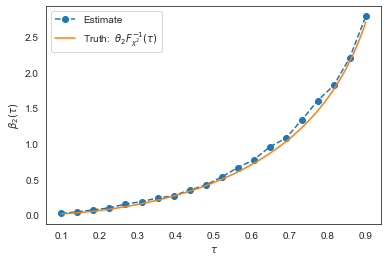

In [24]:
fig,ax = plt.subplots(); 
ax.plot(taus, ts[:,1], '--o', label='Estimate'); 
tt = np.linspace(0.1, 0.9, 100)
ax.plot(tt, theta[1]*icdf(tt), label='Truth:  $\\theta_2 F_{\\chi^2}^{-1}(\\tau)$')
ax.set_xlabel('$\\tau$'); ax.set_ylabel('$\\beta_2(\\tau)$'); 
ax.legend(); 

plt.savefig('estimates_over_tau_range.pdf')

# Criterion 

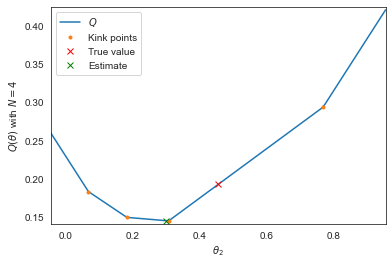

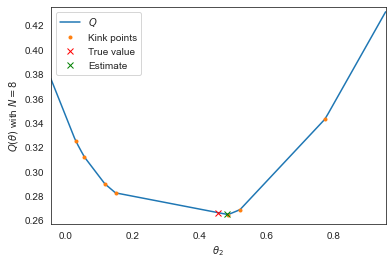

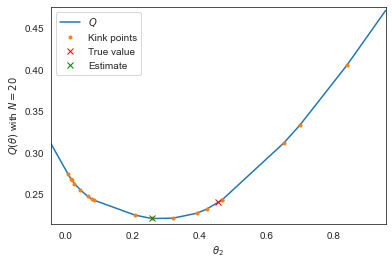

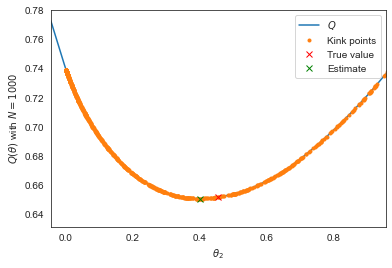

In [25]:
for N in [4, 8, 20, 1000]: 
    np.random.seed(2)
    theta = np.array([1,1])
    icdf = lambda x : chi2.ppf(x, df=1)
    y,x = qreg.sim_data_alt(theta, N, icdf)

    tau = 0.5 
    theta_true0 = theta[0] 
    theta_true = theta[1] * icdf(tau)
    tt = np.linspace(theta_true - .5, theta_true + 0.5, 100)
    qq = np.empty(tt.shape)

    Q = lambda theta : np.mean(qreg.q(theta, y, x, tau))
    theta_ = np.copy(theta)

    def Q(theta1): 
        q = qreg.q(np.array([theta[0], theta1]), y, x, tau)
        return np.mean(q) 

    for i,t in enumerate(tt): 
        qq[i] = Q(t) 

    fig,ax = plt.subplots(); 
    ax.plot(tt,qq,'-', label='$Q$'); 

    # show kink points 
    # since theta[0] is constant, we can calculate where y = x@theta occurs exactly 
    cuts = (y - theta[0]) / x[:,1]
    QQ = np.array([Q(cut) for cut in cuts])
    ax.plot(cuts, QQ, '.', label='Kink points'); 

    # true value of theta 
    ax.plot(theta_true, Q(theta_true), 'xr', label='True value'); 

    # "estimate" (the minimum on the grid tt) 
    ihat = np.where(qq == qq.min()); 
    ax.plot(tt[ihat], qq[ihat], 'xg', label='Estimate'); 

    # nicify graph 
    ax.set_xlim((tt.min(), tt.max())); 
    ax.set_ylim((qq.min()*.97, qq.max()*1.01)); 
    ax.legend(); 
    ax.set_xlabel('$\\theta_2$'); ax.set_ylabel(f'$Q(\\theta)$ with $N = {N}$'); 

    plt.savefig(f'kinks_N_{N}.pdf')